<a id='wrang'></a>
# 1. Data Wrangling

In [1]:
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import _euclidean_distances
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import pickle

%matplotlib inline
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#importing raw data
df2= pd.read_csv("C://Users//ahmed.saeed//Desktop//Job_Risk//Job_Risk//Delay//df2_JOB_RISK2.csv", sep=',', low_memory=False)
df2

,Unnamed: 0,Brand,Unit,Job_type,Subject,Delay,Language_Pair,Start_TimeStamp,Price,Deivery_TimeStamp,amount,Duration,PM,Account,feedback,profitability
0,0,13,4,12,22,0,274,1182.42,0.00,1182.67,2.50,0.25,34,8089,0,0
1,1,0,4,12,22,0,710,1182.39,0.00,1182.50,0.25,0.11,166,5301,1,0
2,2,13,10,24,22,0,44,1182.38,30.57,1182.51,401.00,0.13,114,673,0,2
3,3,6,10,22,32,0,452,1182.36,0.46,1182.46,7.00,0.10,164,4448,0,2
4,4,13,10,24,22,1,44,1182.34,7.47,1182.36,98.00,0.02,114,673,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317378,327338,8,10,25,22,0,624,-113.46,7.40,1.67,123.33,115.13,63,7846,0,2
317379,327339,11,4,12,52,1,274,-237.54,30.00,-237.33,1.00,0.21,10,5445,0,2
317380,327340,11,4,23,22,1,298,-313.71,22.00,-313.33,1.00,0.38,10,5809,0,2
317381,327341,6,4,12,22,1,650,-452.71,94.12,-452.33,2.27,0.38,5,5234,0,2


In [4]:
filename = 'C://Users//ahmed.saeed//Desktop//Job_Risk//Job_Risk//Feedback//rf_model_fitted_Feedback.sav'
rf_model = pickle.load(open(filename, 'rb'))


C:\Users\ahmed.saeed\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ahmed.saeed\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
# Introduing features and label
X = df2[['Brand', 'Unit', 'Job_type','Subject', 'Delay','Language_Pair','Start_TimeStamp',
         'Price','Deivery_TimeStamp','amount','Duration', 'PM', 'Account']]
y = np.array(df2["feedback"]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


# Step 3. – Making predictions with our model

In [6]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [8]:
prob = rf_model.predict_proba(X_test)
prob

array([[1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.35, 0.65],
       [1.  , 0.  ],
       [0.91, 0.09]])

In [9]:
rf_model.classes_

array([0, 1])

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     60377
           1       0.83      0.54      0.66      3100

    accuracy                           0.97     63477
   macro avg       0.90      0.77      0.82     63477
weighted avg       0.97      0.97      0.97     63477



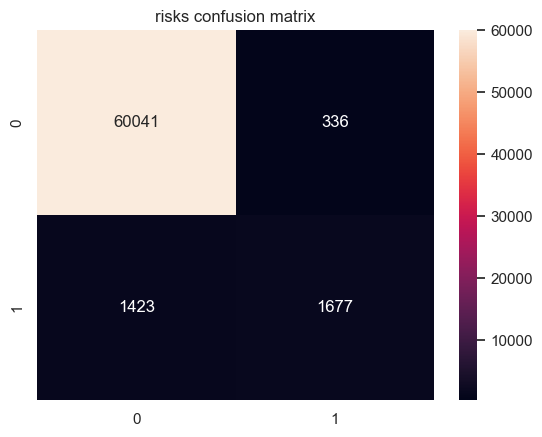

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('risks confusion matrix')

print(classification_report(y_test,y_pred))
#Vertical (actual), horizontal (prediction)

In [11]:
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
    print (f" the importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i+=1

 the importance of feature 'Brand' is 5.85%.
 the importance of feature 'Unit' is 1.61%.
 the importance of feature 'Job_type' is 3.51%.
 the importance of feature 'Subject' is 6.05%.
 the importance of feature 'Delay' is 6.56%.
 the importance of feature 'Language_Pair' is 5.99%.
 the importance of feature 'Start_TimeStamp' is 9.39%.
 the importance of feature 'Price' is 12.97%.
 the importance of feature 'Deivery_TimeStamp' is 9.49%.
 the importance of feature 'amount' is 9.72%.
 the importance of feature 'Duration' is 9.43%.
 the importance of feature 'PM' is 7.55%.
 the importance of feature 'Account' is 11.88%.


In [12]:
dfn1 = pd.DataFrame(prob, columns=['Positive', 'negative'])
dfn1['y_pred'] = y_pred
dfn1['y_test'] = y_test

dfn1

,Positive,negative,y_pred,y_test
0,1.00,0.00,0,0
1,0.99,0.01,0,0
2,1.00,0.00,0,0
3,1.00,0.00,0,0
4,0.59,0.41,0,0
...,...,...,...,...
63472,0.95,0.05,0,0
63473,1.00,0.00,0,0
63474,0.35,0.65,1,1
63475,1.00,0.00,0,0


In [13]:
dfn1['9_pred'] = np.where((dfn1['negative'] > 0.09) , 1, 0)

dfn1

,Positive,negative,y_pred,y_test,9_pred
0,1.00,0.00,0,0,0
1,0.99,0.01,0,0,0
2,1.00,0.00,0,0,0
3,1.00,0.00,0,0,0
4,0.59,0.41,0,0,1
...,...,...,...,...,...
63472,0.95,0.05,0,0,0
63473,1.00,0.00,0,0,0
63474,0.35,0.65,1,1,1
63475,1.00,0.00,0,0,0


In [14]:
dfn1.to_excel("C://Users//ahmed.saeed//Desktop//Job_Risk//Job_Risk//Profitability//RF_feedback.xlsx", header=True)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     60377
           1       0.83      0.54      0.66      3100

    accuracy                           0.97     63477
   macro avg       0.90      0.77      0.82     63477
weighted avg       0.97      0.97      0.97     63477



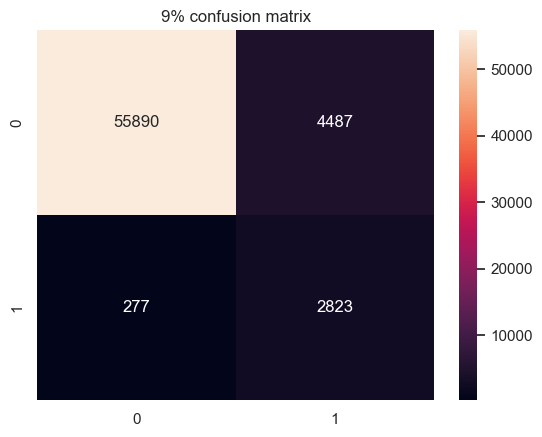

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
cm9 = confusion_matrix(y_test, dfn1['9_pred'])
sns.heatmap(cm9, annot=True, fmt='d').set_title('9% confusion matrix')

print(classification_report(y_test,y_pred))
#Vertical (actual), horizontal (prediction)

In [16]:
a,b = (cm9.diagonal()/cm9.sum(axis=1))*100
print ("No Feedback 91 :", a,
       "\nFeedback 9:", b)

No Feedback 91 : 92.56836212465012 
Feedback 9: 91.06451612903226


In [17]:
#final Prediction (Feedback @ 9%)